In [1]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
%matplotlib inline

### displaying opencv image using matplotlib is tricky.
1. step-1 need to change the color channels. Opencv stores in BGR (Black, Green, Red) but matplotlib assumes RGB order
2. second part is for showing the bounding boxes around image

In [2]:
def show_opencv_image(cv_image, title=None, annotations = None):
    '''draws open cv image and annotations

    Keyword arguments:
    cv_image: the open cv Image object
    title: title of the plot to be displayed
    annotations: annotations, at the moment only rectangle is supported
    '''
    
    matplotlib_img = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])    
    im = ax.imshow(matplotlib_img)    
    
    if annotations:
        rects = []
        for annotation in annotations:
            # Create a Rectangle patch
            p = patches.Rectangle(annotation['start'], annotation['width'], annotation['height'], fill=False, transform=ax.transData, clip_on=False, color='r')            
            #rects.append(p)
            ax.add_patch(p)
        #ax.add_collection(PatchCollection(rects, match_original=True))
    plt.title(title)
    plt.show()    

### Reading deep network learnt weights
first parameter is the file path for the deep network architecture
second aprameter is file path containing the weights of all layers
more at: https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/ 

In [3]:
face_detection_model = cv2.dnn.readNetFromCaffe(r'D:\samples\data_science\image_processing\py-image-search\deep-learning-face-detection\deploy.prototxt.txt', r'D:\samples\data_science\image_processing\py-image-search\deep-learning-face-detection\res10_300x300_ssd_iter_140000.caffemodel')

### Reading the input image

In [5]:
image = cv2.imread(r'D:\samples\data_science\image_processing\py-image-search\deep-learning-face-detection\melville beach.JPG')
(h, w) = image.shape[:2]

### Show original image

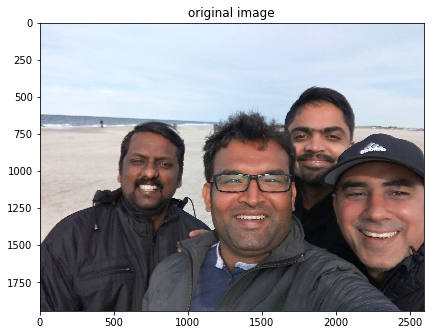

In [12]:
show_opencv_image(image, 'original image')

### convert opencv image to blob object.
opencv DNN module understands only blob objects

In [6]:
#resizing the image to 300x300
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))

### scan for faces in the image

In [14]:
face_detection_model.setInput(blob)
detections = face_detection_model.forward()

In [18]:
annotations = []
# loop over the detections
for i in range(0, detections.shape[2]):
# extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]
    #print('confidence:', confidence)
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > .50:
        # compute the (x, y)-coordinates of the bounding box for the object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
 
        # draw the bounding box of the face along with the associated probability
        text = "{:.2f}%".format(confidence * 100)
        rectangle = {'start':(startX, startY), 'width':endX-startX, 'height':endY-startY, 'text':text}
        annotations.append(rectangle)

### mark the detected faces

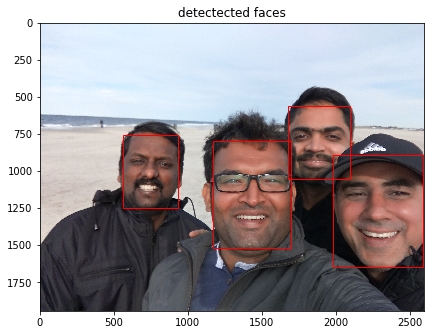

In [19]:

show_opencv_image(image, 'detectected faces', annotations)